In [2]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.194
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multi

In [0]:
#============================================================== VGG 16 =================================================================

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/Assignment 5 Dataset/Assignment 5 Dataset"

In [7]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
validation_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=4)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=16, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


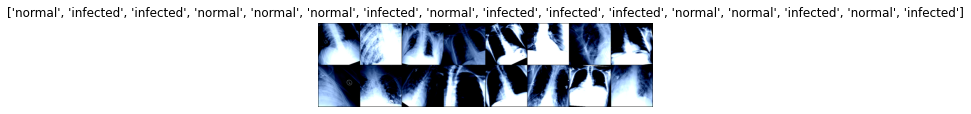

In [8]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [9]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [10]:
print(vgg16.classifier[3])

Linear(in_features=4096, out_features=4096, bias=True)


In [11]:
num_features = vgg16.classifier[0].in_features
features = list(vgg16.classifier.children())[:-7] # Remove last layer
print(num_features)
print(features)

25088
[]


In [0]:
# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

In [0]:
features.extend([nn.Linear(num_features, (22*10+100))])
features.extend([nn.ReLU(inplace=True)])
features.extend([nn.Dropout(p=0.5, inplace=False)])
features.extend([nn.Linear((22*10+100), len(class_names))])

In [14]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

In [16]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

vgg16.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)             #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
        
    torch.save(vgg16.state_dict(), '/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/vgg16_ft.pth')

print('Finished Training')

Train Epoch: 0 [11984/12000 (100%)]	Loss: 0.345438: : 750it [20:45,  1.66s/it]
Train Epoch: 1 [11984/12000 (100%)]	Loss: 0.124696: : 750it [03:39,  3.42it/s]
Train Epoch: 2 [11984/12000 (100%)]	Loss: 0.232489: : 750it [03:38,  3.43it/s]
Train Epoch: 3 [11984/12000 (100%)]	Loss: 0.263635: : 750it [03:39,  3.41it/s]
Train Epoch: 4 [11984/12000 (100%)]	Loss: 0.196405: : 750it [03:40,  3.40it/s]
Train Epoch: 5 [11984/12000 (100%)]	Loss: 0.282358: : 750it [03:40,  3.41it/s]
Train Epoch: 6 [11984/12000 (100%)]	Loss: 0.103733: : 750it [03:44,  3.33it/s]
Train Epoch: 7 [11984/12000 (100%)]	Loss: 0.139606: : 750it [03:47,  3.29it/s]
Train Epoch: 8 [11984/12000 (100%)]	Loss: 0.331522: : 750it [03:44,  3.34it/s]
Train Epoch: 9 [11984/12000 (100%)]	Loss: 0.210999: : 750it [03:45,  3.32it/s]


Finished Training


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


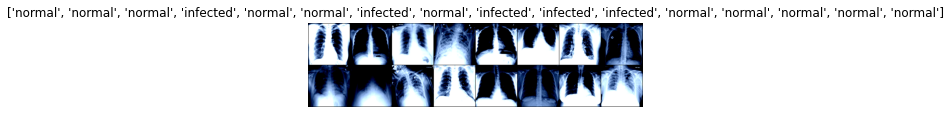

In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)

In [18]:
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))

Predicted:  normal normal normal infected normal normal infected normal infected infected infected normal normal normal normal infected
Ground Truth:  normal normal normal infected normal normal infected normal infected infected infected normal normal normal normal normal


In [21]:
correct = 0
total = 0
val_confusion_Matrix_vgg = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            val_confusion_Matrix_vgg[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            val_confusion_Matrix_vgg[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            val_confusion_Matrix_vgg[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            val_confusion_Matrix_vgg[1][1] += 1

print('Accuracy of the network on the %d validation images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1500 validation images: 89 %


In [22]:
correct = 0
total = 0
test_confusion_Matrix_vgg = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            test_confusion_Matrix_vgg[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            test_confusion_Matrix_vgg[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            test_confusion_Matrix_vgg[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            test_confusion_Matrix_vgg[1][1] += 1

print('Accuracy of the network on the %d test images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1506 test images: 97 %


Validation Set Confusion Matrix
[[562 105]
 [ 53 780]]


Text(0.5, 0, 'Predicted labels')

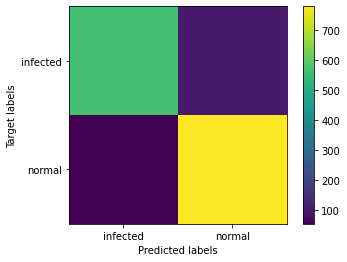

In [25]:
print("Validation Set Confusion Matrix")
print(val_confusion_Matrix_vgg)
plt.imshow(val_confusion_Matrix_vgg, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

Test Set Confusion Matrix
[[597  23]
 [ 18 868]]


Text(0.5, 0, 'Predicted labels')

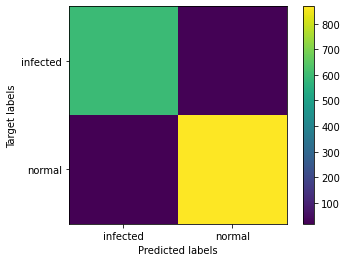

In [26]:
print("Test Set Confusion Matrix")
print(test_confusion_Matrix_vgg)
plt.imshow(test_confusion_Matrix_vgg, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

In [0]:
#============================================================== RESNET 18 =================================================================

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/Assignment 5 Dataset/Assignment 5 Dataset"

In [38]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
validation_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=4)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=16, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


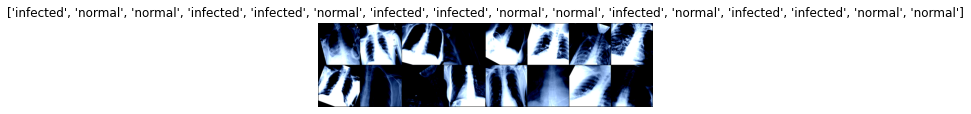

In [39]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [40]:
# Load the pretrained model from pytorch
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [41]:
print('Output Layer of RESNET18 : ', resnet18.fc.out_features)

Output Layer of RESNET18 :  1000


In [0]:
num_features = resnet18.fc.in_features
resnet18.fc = None

In [0]:
# Freeze training for all layers
for param in resnet18.parameters():
    param.require_grad = False

In [0]:
resnet18.fc = nn.Sequential(
            nn.Linear(num_features, (22*10+100)), #(no of inputs, no of outputs)
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear((22*10+100), len(class_names))
        )

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

In [46]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

resnet18.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = resnet18(inputs)             #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
        
    torch.save(resnet18.state_dict(), '/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/resnet18_ft.pth')

print('Finished Training')

Train Epoch: 0 [11984/12000 (100%)]	Loss: 0.546534: : 750it [03:35,  3.47it/s]
Train Epoch: 1 [11984/12000 (100%)]	Loss: 0.172085: : 750it [03:35,  3.48it/s]
Train Epoch: 2 [11984/12000 (100%)]	Loss: 0.815242: : 750it [03:33,  3.51it/s]
Train Epoch: 3 [11984/12000 (100%)]	Loss: 0.314636: : 750it [03:32,  3.54it/s]
Train Epoch: 4 [11984/12000 (100%)]	Loss: 0.187506: : 750it [03:33,  3.51it/s]
Train Epoch: 5 [11984/12000 (100%)]	Loss: 0.139997: : 750it [03:33,  3.51it/s]
Train Epoch: 6 [11984/12000 (100%)]	Loss: 0.079911: : 750it [03:33,  3.52it/s]
Train Epoch: 7 [11984/12000 (100%)]	Loss: 0.330256: : 750it [03:32,  3.52it/s]
Train Epoch: 8 [11984/12000 (100%)]	Loss: 0.167623: : 750it [03:33,  3.52it/s]
Train Epoch: 9 [11984/12000 (100%)]	Loss: 0.076648: : 750it [03:33,  3.52it/s]


Finished Training


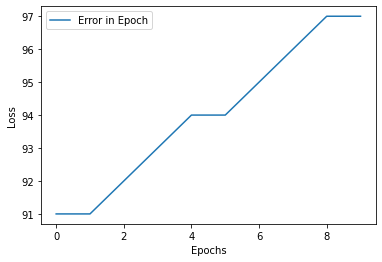

In [50]:
epoch_array = [0,1,2,3,4,5,6,7,8,9]
error_per_epoch = [91, 91, 92, 93, 94, 94, 95, 96, 97, 97]

plt.plot(epoch_array, error_per_epoch, label = "Error in Epoch")
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


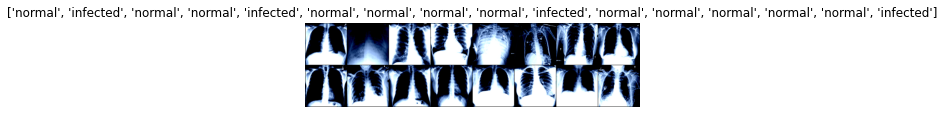

In [68]:
dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)

In [69]:
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = resnet18(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))

Predicted:  normal infected normal normal infected infected normal normal normal infected normal normal normal normal normal infected
Ground Truth:  normal infected normal normal infected normal normal normal normal infected normal normal normal normal normal infected


In [105]:
correct = 0
total = 0
val_loss_array = []
val_accuracy_array = []
val_confusion_Matrix_resnet = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            val_confusion_Matrix_resnet[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            val_confusion_Matrix_resnet[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            val_confusion_Matrix_resnet[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            val_confusion_Matrix_resnet[1][1] += 1

print('Accuracy of the network on the %d validation images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1500 validation images: 88 %


In [107]:
correct = 0
total = 0
test_loss_array = []
test_accuracy_array = []
test_confusion_Matrix_resnet = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print((predicted == labels).sum().item())
        # print(labels)
        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            test_confusion_Matrix_resnet[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            test_confusion_Matrix_resnet[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            test_confusion_Matrix_resnet[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            test_confusion_Matrix_resnet[1][1] += 1

print('Accuracy of the network on the %d test images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1506 test images: 96 %


Validation Set Confusion Matrix
[[530  92]
 [ 85 793]]


Text(0.5, 0, 'Predicted labels')

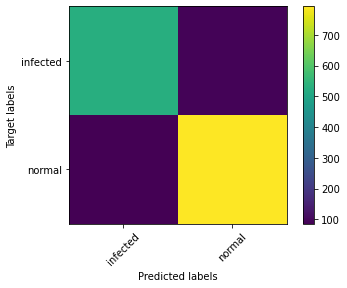

In [115]:
print("Validation Set Confusion Matrix")
print(val_confusion_Matrix)
plt.imshow(val_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

Test Set Confusion Matrix
[[587  26]
 [ 28 865]]


Text(0.5, 0, 'Predicted labels')

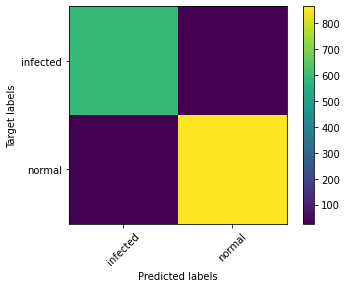

In [117]:
print("Test Set Confusion Matrix")
print(test_confusion_Matrix)
plt.imshow(test_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

In [0]:
#==================================================================  TASK 2 ==============================================================

In [0]:
#================================================================== VGG 16 =================================================================

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/Assignment 5 Dataset/Assignment 5 Dataset"

In [0]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
validation_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=4)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=16, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


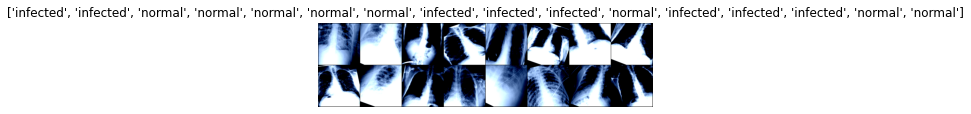

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [0]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
print('Output Layer of VGG16 : ', vgg16.classifier[6].out_features) # 1000 

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
print(vgg16.classifier[3])

Linear(in_features=4096, out_features=4096, bias=True)


In [0]:
num_features = vgg16.classifier[0].in_features
features = list(vgg16.classifier.children())[:-7] # Remove last layer
print(num_features)
print(features)

25088
[]


In [0]:
# Freeze training for all layers
# for param in vgg16.features.parameters():
#     param.require_grad = False

In [0]:
features.extend([nn.Linear(num_features, (22*10+100))])
features.extend([nn.ReLU(inplace=True)])
features.extend([nn.Dropout(p=0.5, inplace=False)])
features.extend([nn.Linear((22*10+100), len(class_names))])

In [0]:
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

vgg16.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = vgg16(inputs)             #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
        
    torch.save(vgg16.state_dict(), '/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/vgg16_ft.pth')

print('Finished Training')

Train Epoch: 0 [11984/12000 (100%)]	Loss: 0.048697: : 750it [03:57,  3.16it/s]
Train Epoch: 1 [11984/12000 (100%)]	Loss: 0.352438: : 750it [03:58,  3.14it/s]
Train Epoch: 2 [11984/12000 (100%)]	Loss: 0.149972: : 750it [03:59,  3.14it/s]
Train Epoch: 3 [11984/12000 (100%)]	Loss: 0.331436: : 750it [03:54,  3.20it/s]
Train Epoch: 4 [11984/12000 (100%)]	Loss: 0.285505: : 750it [03:52,  3.22it/s]
Train Epoch: 5 [5744/12000 (48%)]	Loss: 0.106917: : 360it [01:50,  3.56it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


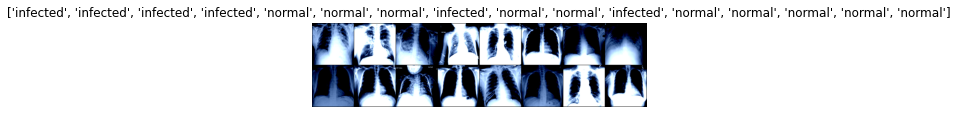

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)

In [0]:
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = vgg16(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))

In [0]:
correct = 0
total = 0
val_confusion_Matrix_vgg = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            val_confusion_Matrix_vgg[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            val_confusion_Matrix_vgg[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            val_confusion_Matrix_vgg[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            val_confusion_Matrix_vgg[1][1] += 1

print('Accuracy of the network on the %d validation images: %d %%' % (total, 
    100 * correct / total))

RuntimeError: ignored

In [0]:
correct = 0
total = 0
test_confusion_Matrix_vgg = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

         for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            test_confusion_Matrix_vgg[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            test_confusion_Matrix_vgg[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            test_confusion_Matrix_vgg[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            test_confusion_Matrix_vgg[1][1] += 1

print('Accuracy of the network on the %d test images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1506 test images: 97 %


Validation Set Confusion Matrix
[[530  92]
 [ 85 793]]


Text(0.5, 0, 'Predicted labels')

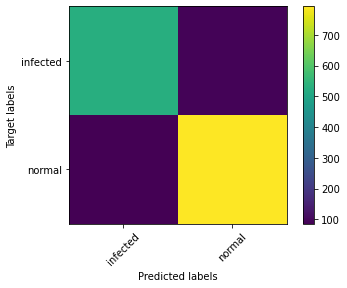

In [0]:
print("Validation Set Confusion Matrix")
print(val_confusion_Matrix)
plt.imshow(val_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

Test Set Confusion Matrix
[[587  26]
 [ 28 865]]


Text(0.5, 0, 'Predicted labels')

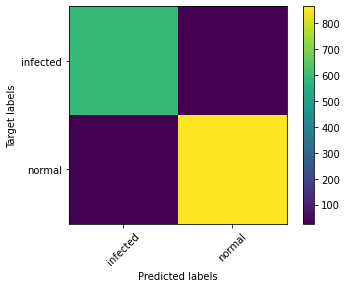

In [0]:
print("Test Set Confusion Matrix")
print(test_confusion_Matrix)
plt.imshow(test_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

In [0]:
#============================================================== RESNET 18 =================================================================

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [0]:
data_dir = "/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/Assignment 5 Dataset/Assignment 5 Dataset"

In [0]:
#Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

#pass transform here-in
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
validation_data = datasets.ImageFolder(data_dir + '/validation', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#data loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=4)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=16, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=4)

print("Classes: ")
class_names = train_data.classes
print(class_names)

Classes: 
['infected', 'normal']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


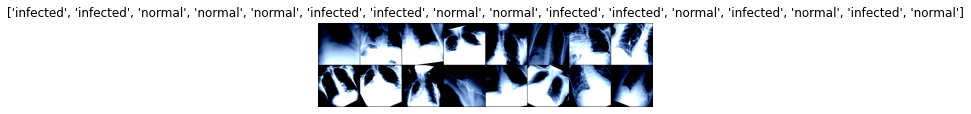

In [0]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(trainloader))
show_databatch(inputs, classes)

In [0]:
# Load the pretrained model from pytorch
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

In [0]:
print('Output Layer of RESNET18 : ', resnet18.fc.out_features)

Output Layer of RESNET18 :  1000


In [0]:
num_features = resnet18.fc.in_features
resnet18.fc = None

In [0]:
# Freeze training for all layers
# for param in resnet18.parameters():
#     param.require_grad = False

In [0]:
resnet18.fc = nn.Sequential(
            nn.Linear(num_features, (22*10+100)), #(no of inputs, no of outputs)
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear((22*10+100), len(class_names))
        )

In [0]:
Epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

In [0]:
from tqdm import tqdm

#if you have gpu then you need to convert the network and data to cuda
#the easiest way is to first check for device and then convert network and data to device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

resnet18.train()

for epoch in range(Epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader))
    for i, data in pbar:
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # In PyTorch, we need to set the gradients to zero before starting to do backpropragation 
        # because PyTorch accumulates the gradients on subsequent backward passes. 
        # This is convenient while training RNNs. 
        # So, the default action is to accumulate the gradients on every loss.backward() call

        # forward + backward + optimize
        outputs = resnet18(inputs)             #----> forward pass
        loss = criterion(outputs, labels)   #----> compute loss
        loss.backward()                     #----> backward pass
        optimizer.step()                    #----> weights update

        # print statistics
        running_loss += loss.item()
        
        pbar.set_description(
            'Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(trainloader.dataset),
                100. * i / len(trainloader),
                loss.item()))
        
    torch.save(resnet18.state_dict(), '/content/drive/My Drive/Colab Notebooks/Deep Learning/SOBAN_BSCS16022_05/resnet18_ft.pth')

print('Finished Training')

Train Epoch: 0 [11984/12000 (100%)]	Loss: 0.392232: : 750it [03:44,  3.33it/s]


FileNotFoundError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


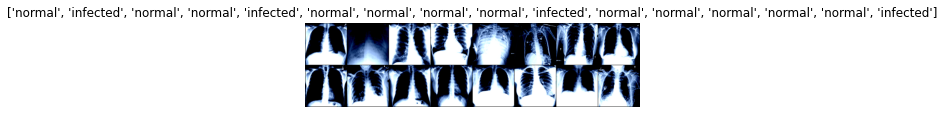

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
show_databatch(images, labels)

In [0]:
images, labels = images.to(device), labels.to(device) #-->convert test image to cuda (if available)
outputs = resnet18(images)                               #--> forward pass
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(len(images))))
print('Ground Truth: ', ' '.join('%5s' % class_names[labels[j]]
                              for j in range(len(images))))

Predicted:  normal infected normal normal infected infected normal normal normal infected normal normal normal normal normal infected
Ground Truth:  normal infected normal normal infected normal normal normal normal infected normal normal normal normal normal infected


In [0]:
correct = 0
total = 0
val_loss_array = []
val_accuracy_array = []
val_confusion_Matrix_resnet = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            val_confusion_Matrix_resnet[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            val_confusion_Matrix_resnet[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            val_confusion_Matrix_resnet[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            val_confusion_Matrix_resnet[1][1] += 1

print('Accuracy of the network on the %d validation images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1500 validation images: 88 %


In [0]:
correct = 0
total = 0
test_loss_array = []
test_accuracy_array = []
test_confusion_Matrix_resnet = np.zeros((2,2), dtype=int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print((predicted == labels).sum().item())
        # print(labels)
        for i in range(len(predicted)):
          if(predicted[i] == 0 and labels[i] == 0):
            test_confusion_Matrix_resnet[0][0] += 1
          if(predicted[i] == 0 and labels[i] == 1):
            test_confusion_Matrix_resnet[0][1] += 1
          if(predicted[i] == 1 and labels[i] == 0):
            test_confusion_Matrix_resnet[1][0] += 1
          if(predicted[i] == 1 and labels[i] == 1):
            test_confusion_Matrix_resnet[1][1] += 1

print('Accuracy of the network on the %d test images: %d %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 1506 test images: 96 %


Validation Set Confusion Matrix
[[530  92]
 [ 85 793]]


Text(0.5, 0, 'Predicted labels')

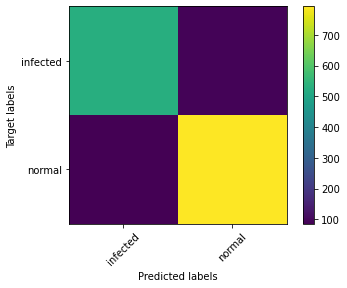

In [0]:
print("Validation Set Confusion Matrix")
print(val_confusion_Matrix)
plt.imshow(val_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')

Test Set Confusion Matrix
[[587  26]
 [ 28 865]]


Text(0.5, 0, 'Predicted labels')

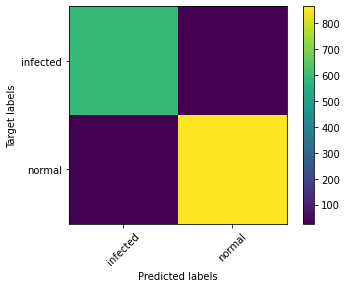

In [0]:
print("Test Set Confusion Matrix")
print(test_confusion_Matrix)
plt.imshow(test_confusion_Matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('Target labels')
plt.xlabel('Predicted labels')